# 10과 [예제] 범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류  
④ 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [4]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


범주별 숫자를 비교할 때 사용되는 방식은 범주별 평균 비교 입니다.  


## 2.평균비교

### 평균

* 범주 ==> 숫자 의 관계를 살펴볼 때 중요한 관점은 ‘평균비교’ 입니다. 

* 평균을 비교할 때는 두 가지를 고려해야 합니다.
    * ① 평균값이 그 집단을 대표할 수 있는가?
    * ② 평균값이 믿을 만 한가?

### 1) 평균값이 그 집단을 대표할 수 있는가?

* 만약에, 생존여부--> 나이 관점에서 데이터를 본다고 합시다.   
(실제로는 나이 --> 생존여부지만요.^^)

In [6]:
s0 = titanic.loc[titanic['Survived']==0, 'Age']
s1 = titanic.loc[titanic['Survived']==1, 'Age']

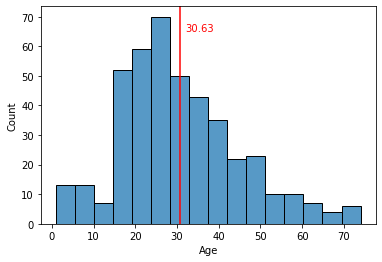

In [7]:
# 사망자의 나이 분포
sns.histplot(s0, bins = 16)
plt.axvline(s0.mean(), color='r')
plt.text(32, 65, round(s0.mean(),2), color = 'r')
plt.show()

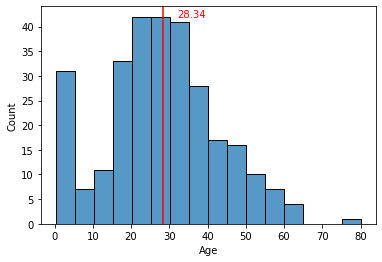

In [8]:
# 생존자의 나이 분포
sns.histplot(s1, bins = 16)
plt.axvline(s1.mean(), color='r')
plt.text(32, 42, round(s1.mean(),2), color = 'r')
plt.show()

생존여부에 따라서 나이에 차이가 있다고 보이나요?

* 아래 동영상은 못보셨다면 꼭 보세요~!

> 평균의 함정 : https://www.youtube.com/watch?v=Pp_Pd6GZLOE

### 2) 평균값을 믿을 만 한가?

* 표본 조사를 수행하기로 결정하였을 때,다음 두가지 조사의 오차에 대해서 생각해 봅시다.
    * 조사1 : 전국 성인 10명을 무작위로 뽑아서, 키를 재고 그 평균을 계산했더니 174 cm
    * 조사2 : 전국 성인 1000명을 무작위로 뽑아서, 키를 재고 그 평균을 계산했더니 166 cm

* 어떤 조사 결과가 전국 성인의 평균키와 더 가까울 까요? 어떤 조사 결과가 **오차**가 더 적을 까요?

* 평균이 믿을만 한지는 오차로 평가해야 합니다.
    * 표준편차
    * 표준오차

### 표준편차(SD, Standard Deviation)
* 한 집단을 설명하기 위해서
* 그 집단 안에서 대푯값으로 평균을 구할 때
* 값들이 평균으로부터 얼마나 벗어나 있는지(이탈도, deviation)를 나타내는 값.
    * 예 : 우리 반 수학 성적의 평균이 91, 표준편차는 10

In [10]:
a = np.array([23,54,47,64,29,15])

print(f'평균 : {a.mean()}')
print(f'표준편차 : {a.std()}')

평균 : 38.666666666666664
표준편차 : 17.53726191728787


평균 38.6, 표준편차 17.5는 집단 a를 설명(대표)하는 숫자 입니다.

In [13]:
titanic.groupby(by='Survived')['Age'].std()

Survived
0    14.172110
1    14.950952
Name: Age, dtype: float64

In [11]:
# 표준편차
titanic.groupby('Survived')['Age'].agg(['mean','std']) # agg()는 리스트로 넣어서 정리하면 한꺼번에 보여준다

,mean,std
Survived,,
0,30.626179,14.172110
1,28.343690,14.950952


### 표준오차(SE, standard error)

* 전체(모집단)를 추정하기 위해서(샘플조사를 합니다.)
* 무작위로 샘플을 뽑아서(랜덤샘플) 평균을 구했는데, 
* 샘플의 평균이 전체(모집단)의 평균과 얼마나 오차가 발생하는지를 나타내는 값.
* 신뢰구간과 관련이 있다.

* 표준오차 공식 : 𝑠/√𝑛
    * 샘플의 표준 편차 : s
    * 데이터 건수 : n

* 몇가지 기호에 대해서
![image.png](attachment:image.png)

In [14]:
# 표준오차 : sem

titanic.groupby('Survived')['Age'].agg(['mean','std','sem'])

,mean,std,sem
Survived,,,
0,30.626179,14.172110,0.688258
1,28.343690,14.950952,0.877950


### 95% 신뢰구간

* 모집단을 하나 준비합니다.

In [15]:
# 임의의 모집단을 하나 만듭시다.
pop2 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]

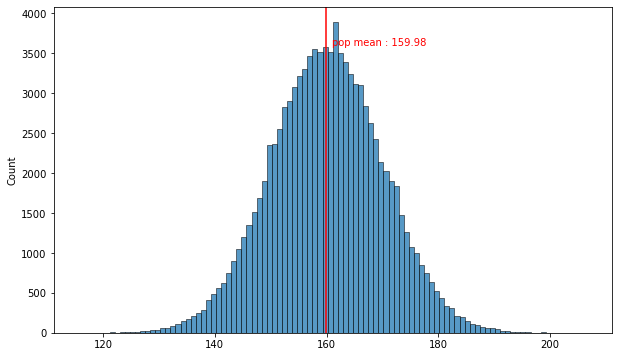

In [18]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다. (보고 나서 못 본 것으로 합시다.ㅎㅎ)

plt.figure(figsize=(10,6))
sns.histplot(pop2, bins = 100)
plt.axvline(np.mean(pop2), color = 'r')
plt.text(np.mean(pop2)+1, 3600, f'pop mean : {np.mean(pop2).round(2)}', color = 'r')
plt.show()

* 표본 조사를 합니다. 
    * 100명을 임의로 샘플링 해서 
    * 표본의 평균과, 표준 오차, 신뢰구간을 계산해 봅시다.

In [19]:
# 표본조사를 합니다. 100건
s1 = rd.sample(pop2,100)
s1 = pd.Series(s1)
s1.mean(), s1.std(), s1.sem()

(160.96999999999997, 9.984285632731048, 0.9984285632731048)

In [20]:
1.96 * s1.sem()

1.9569199840152853

In [21]:
# 95% 신뢰구간
s1.mean() - (1.96 * s1.sem()), s1.mean() + (1.96 * s1.sem())

(159.01308001598468, 162.92691998401526)

* 표본평균의 신뢰구간과 모평균을 비교해 봅시다.

In [22]:
# 모평균은?
np.mean(pop2)

159.98133900000002

* 95% 신뢰구간에 대한 실험을 해 봅시다.
    * 샘플조사를 100번 수행합니다.
    * 그때마다 신뢰구간을 계산한 후
    * 그 중 몇번이 모평균을 포함하는지 확인해 봅시다.
    * 95% 신뢰구간이라면, 100번 중 95번은 모평균을 포함해야 합니다.

In [26]:
# 100번 샘플링
samples = { 'id' : [], 'value' : []}
for i in range(100) :
    samples['id'] += [i]* 100
    samples['value'] += rd.sample(pop2,100)

samples = pd.DataFrame(samples)
print(samples.shape)
print(samples.head())
print(samples.groupby(by=id)['value'].mean())

(10000, 2)
   id  value
0   0  170.1
1   0  179.2
2   0  147.0
3   0  187.0
4   0  157.3
2336469110832      156.8
2336469110864      150.6
2336469110896      142.2
2336469110928      150.8
2336469110960      178.4
                   ...  
140708473095824    148.9
140708473095856    155.4
140708473095888    159.6
140708473095920    147.8
140708473095952    161.3
Name: value, Length: 10000, dtype: float64


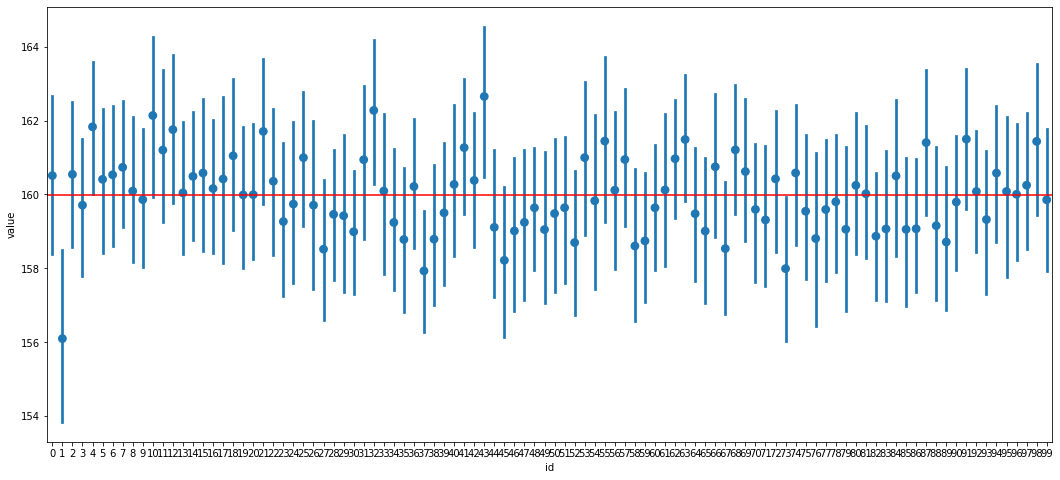

In [27]:
# errorbar 라는 차트 입니다. 
# 신뢰구간, 표준오차 구간을 시각화 하는 방법입니다.

plt.figure(figsize = (18, 8))
sns.pointplot(x = 'id', y = 'value', data = samples, join = False)
plt.axhline(np.mean(pop2), color = 'r') # 모평균
plt.show()

In [ ]:
95%신뢰구간 -> 실험 100번 수행하면 
                95번은 신뢰구간안에 모평균이 포함된다

위 그래프에 대한 해석
* x축은 100번 시도에 대한 순번(인덱스)
* y축은 모평균(빨간 선)을 추정하기 위한 샘플의 평균과, 신뢰구간 표시

## 3.범주 --> 숫자

titanic data에서 Age를 Y로 두고 비교해 봅시다.

### 1) 시각화 : 평균 비교 barplot, boxplot 

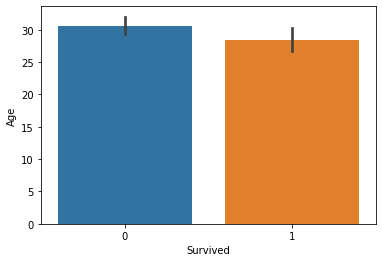

In [28]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="Survived", y="Age", data=titanic)
plt.show()

위 두 범주간에 평균에 차이가 있나요?

- 있다
- 애매하다
* 없다

평균의 차이가 있으나 거의 없어보인다

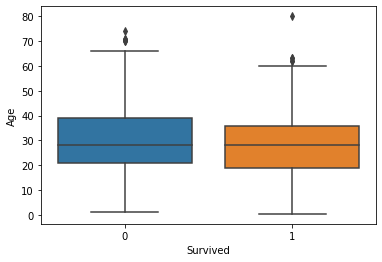

In [29]:
# 박스플롯으로 비교해 봅시다.
sns.boxplot(x='Survived', y = 'Age', data = titanic)
plt.show()

#### 실습 : 다음의 대립가설에 대해서 차트를 그려봅시다.
* 대립가설: 탑승지(Embarked) 별 나이(Age)에 차이가 있다

* sns.barplot

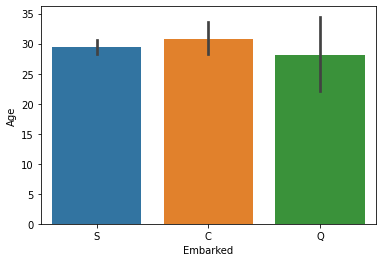

In [30]:
sns.barplot(x=titanic['Embarked'], y=titanic['Age'])
plt.show()

* 신뢰구간이 넓다 = 그 만 큼 못 믿겠다
* 신뢰구간이 좁다 = 더 믿을 만 하다

* sns.boxplot

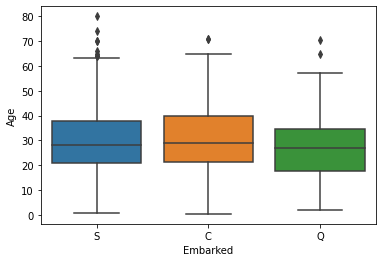

In [32]:
sns.boxplot(x='Embarked', y='Age', data = titanic)
plt.show()

* 차이가 있나요?

→ boxplot을 눈으로 보니 잘 모르겠다 그래서 필요한 것이 수치화이다

### 2)수치화 : t-test(두 범주), anova(세 범주 이상)

#### ①t-test
두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test만 다룹니다.

In [33]:
import scipy.stats as spst
import numpy as np
import random as rd

In [34]:
# 모집단 만들기
pop1 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10),1) for i in range(100000)]

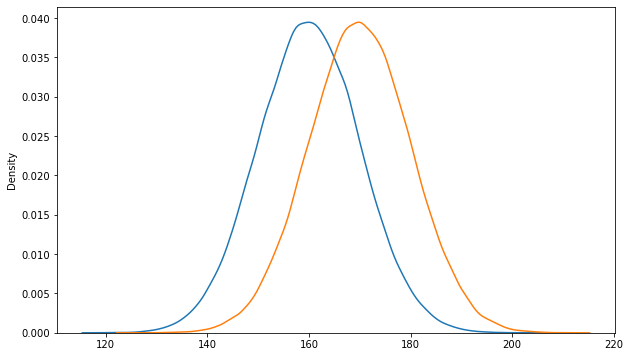

In [35]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다.
plt.figure(figsize=(10,6))
sns.kdeplot(pop1)
sns.kdeplot(pop2)
plt.show()

In [36]:
# 표본을 추출합니다. 먼저 pop1으로 부터 두 샘플을 추출합시다.
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop1,100)

In [37]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=-0.411348863413171, pvalue=0.6812616392491303)

In [38]:
# 이번에는 두 모집단으로 부터 각각 샘플링
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop2,100)

In [39]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=-7.058191676037142, pvalue=2.7789411608574585e-11)

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


In [48]:
# NaN 없애기
temp = titanic.loc[titanic['Age'].notnull()]

died = temp.loc[temp['Survived']==0, 'Age'] # 사망자 나이
survived = temp.loc[temp['Survived']==1, 'Age'] # 생존자 나이

In [49]:
died

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
       ... 
883    28.0
884    25.0
885    39.0
886    27.0
890    32.0
Name: Age, Length: 424, dtype: float64

In [52]:
spst.ttest_ind(died, survived)
# survived의 평균에 비해서 died의 평균이..

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

p.value의 의미는?

p-value = 대립가설(생존→나이)이 맞다고 채택할 때 대립가설이 틀릴 확률

#### 실습 : t-test 
다음 대립가설에 대해서 검정을 해 봅시다.
* 성별('Sex')에 따라 운임('Fare')에 차이가 있을 것이다.  
→ y = Sex, x = Fare

In [57]:
# 1) 범주 쪼개기
f = titanic.loc[titanic['Sex'] == 'female', 'Fare']
m = titanic.loc[titanic['Sex'] == 'male', 'Fare']

In [58]:
# 2)t test
spst.ttest_ind(f, m)

Ttest_indResult(statistic=5.529140269385719, pvalue=4.2308678700429995e-08)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

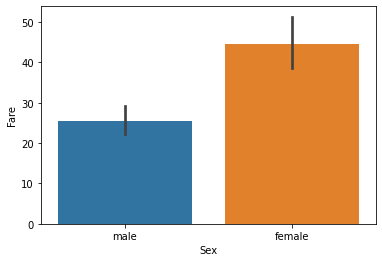

In [59]:
sns.barplot(x='Sex', y='Fare', data = titanic)

→ 성별('Sex')에 따른 평균운임('Fare')은 차이가 있다고 볼 수 있다

#### ②anova

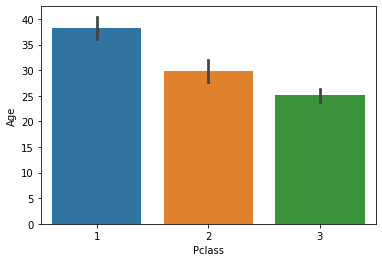

In [60]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.show()

→ 전체평균 대비 각각의 평균 차이 비교

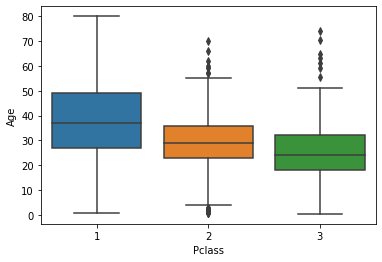

In [61]:
sns.boxplot(x='Pclass', y = 'Age', data = titanic)
plt.show()

In [64]:
# NaN 제외
temp = titanic.loc[titanic['Age'].notnull()]

P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

In [65]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

In [ ]:
pvalue=7.487984171959904e-24) 는 거의 0 이다.  
대립가설이 맞다고 할 때 틀릴 확률로
Pcalss에 따라 나이 차이가 있다고 볼 수 있다


#### 실습 ANOVA

다음 대립가설에 대해서 시각화와 가설검정을 해 봅시다.

* 승선지역(Embarked)별로 운임(Fare)에 차이가 있을 것이다.

In [72]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [79]:
# 1) 먼저 그룸별로 쪼개기
temp = titanic.loc[titanic['Embarked'].notnull()]

e_s = temp.loc[temp.Embarked == 'S', 'Fare']
e_c = temp.loc[temp.Embarked == 'C', 'Fare']
e_q = temp.loc[temp.Embarked == 'Q', 'Fare']

# 2) 분산분석(ANOVA)
spst.f_oneway(e_s, e_c, e_q)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

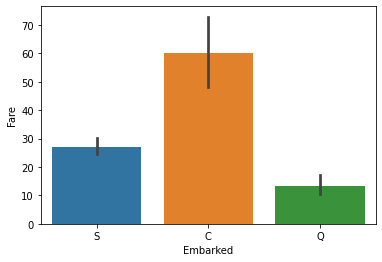

In [80]:
sns.barplot(x='Embarked', y='Fare', data = titanic)
plt.show()